#### Module 6

##### 6.1 - Credit Risk Scoring Project
--Sounds like a regerssion problem to find out proba of risk of default

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("CreditScoring.csv")
df = data.copy()

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [5]:
df.status = df.status.map({1:'ok',2:'default',0:'unk'})

In [6]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [7]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [8]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,partime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [10]:
cols = [col for col in df.columns if df[col].max() == 99999999.0]

for i in cols:
    df[i] = df[i].replace(to_replace = 99999999.0, value=np.nan).max()

In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,959.0,300000.0,30000.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,0.0,0.0,0.0,475.0,628.0
min,0.0,6.0,18.0,35.0,959.0,300000.0,30000.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,959.0,300000.0,30000.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,959.0,300000.0,30000.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,959.0,300000.0,30000.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [12]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [13]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [16]:
del df_train['status']
del df_val['status']
del df_test['status']

In [17]:
from collections import Counter

Counter(y_train)
Counter(y_val)
Counter(y_test)


Counter({0: 632, 1: 259})

In [18]:
####Continue from Module 6.3

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer

In [20]:
train_dicts = df_train.to_dict(orient="records")

In [21]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [22]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [23]:
dt = DecisionTreeClassifier()

In [24]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
dt

DecisionTreeClassifier()

In [26]:
val_dicts = df_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)

In [27]:
y_pred = dt.predict_proba(X_val)

In [28]:
from sklearn.metrics import roc_auc_score

In [29]:
roc_auc_score(y_pred[:,1], y_val)

0.6245517928286853

In [30]:
y_pred = dt.predict_proba(X_train)
roc_auc_score(y_pred[:,1], y_train)

1.0

In [31]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [32]:
y_pred_val = dt.predict(X_val)
y_pred_train = dt.predict(X_train)

print('validation')
print(roc_auc_score(y_pred_val, y_val))
print('-----')
print('train')
roc_auc_score(y_pred_train, y_train)

validation
0.7099450918870461
-----
train


0.7977466273266346

decision stump - a rtree with less depth

In [33]:
from sklearn.tree import export_text

In [34]:
f = list(dv.get_feature_names_out())
f

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [35]:
print(export_text(dt, feature_names=f))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- seniority <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- seniority >  0.50
|   |   |   |   |--- price <= 925.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- price >  925.00
|   |   |   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- home=owner <= 0.50
|   |   |   |   |--- home=parents <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- home=parents >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- home=owner >  0.50
|   |   |   |   |--- expenses <= 52.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- expenses >  52.50
|   |   |   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- time <= 15.00
|   |   |   |--- class: 0
|   |   |--- time >  15.00
|   |   |   |--- job=fixed <= 0.50
|   |   |   |   |--- expenses <= 40.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- expenses >  40.00
|   |   |   |   |   |--

#### 6.5

In [36]:
for d in [1,2,3,4,5,6,10,15,20,None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s: %.3f'%(d,auc))

   1: 0.606
   2: 0.669
   3: 0.713
   4: 0.719
   5: 0.738
   6: 0.747
  10: 0.673
  15: 0.639
  20: 0.636
None: 0.635


In [37]:
scores = []

for d in [4,5,6,None]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d)
        dt.fit(X_train, y_train)
        
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d,s,auc))

In [38]:
df_scores = pd.DataFrame(scores, columns=['max_depth','min_samples_leaf','roc_auc'])

In [39]:
df_scores.sort_values(by='roc_auc',ascending=False)

,max_depth,min_samples_leaf,roc_auc
24,6.0,100,0.746794
18,6.0,1,0.746676
22,6.0,15,0.746667
20,6.0,5,0.746546
21,6.0,10,0.746219
19,6.0,2,0.746219
26,6.0,500,0.746110
23,6.0,20,0.746110
25,6.0,200,0.746101
12,5.0,10,0.737885


In [40]:
pvt = df_scores.pivot(index='min_samples_leaf',columns = 'max_depth', values= 'roc_auc')
pvt.round(3)

max_depth,NaN,4.0,5.0,6.0
min_samples_leaf,,,,
1,0.633,0.719,0.738,0.747
2,0.627,0.719,0.738,0.746
5,0.640,0.719,0.738,0.747
10,0.628,0.719,0.738,0.746
15,0.630,0.719,0.738,0.747
20,0.640,0.719,0.738,0.746
100,0.635,0.719,0.738,0.747
200,0.638,0.719,0.738,0.746
500,0.646,0.719,0.738,0.746


<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>

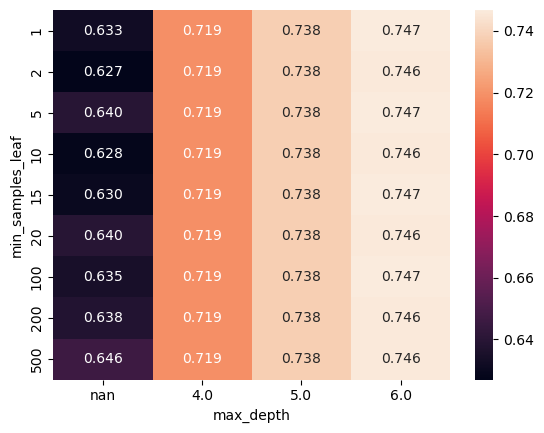

In [41]:
sns.heatmap(pvt, annot=True, fmt='.3f')

In [42]:
dt = DecisionTreeClassifier(max_depth = 5,min_samples_leaf=20)

#### 6.6

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf = RandomForestClassifier(n_estimators = 55,random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=55, random_state=1)

In [45]:
y_pred = rf.predict(X_val)

In [46]:
roc_auc_score(y_pred, y_val)

0.7299206103722033

In [47]:
scores = []
for i in range(10,200,10):
    rf = RandomForestClassifier(n_estimators = i,random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    auc = roc_auc_score(y_pred, y_val)
    scores.append((i, auc))

In [48]:
final = pd.DataFrame(scores, columns = ['n_estimators', 'auc'])

In [49]:
final.sort_values('auc',ascending=False)

,n_estimators,auc
14,150,0.726402
8,90,0.725449
12,130,0.724832
4,50,0.724502
6,70,0.724255
13,140,0.724242
17,180,0.722666
16,170,0.722666
18,190,0.721572
11,120,0.721078


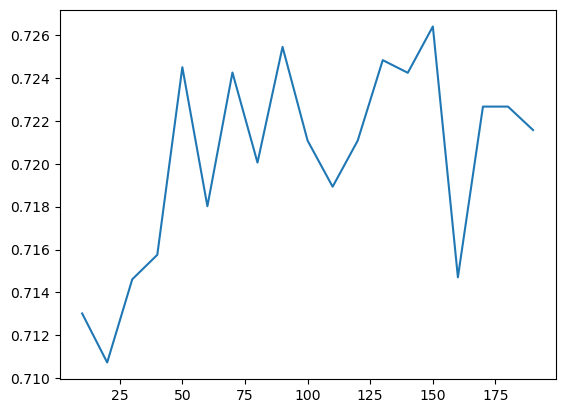

In [50]:
plt.plot(final.n_estimators, final.auc)

In [51]:
scores = []

for d in [5,10,15]: 
    for i in range(10,200,10):
        rf = RandomForestClassifier(n_estimators = i,
                                    max_depth = d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        auc = roc_auc_score(y_pred, y_val)
        scores.append((d,i, auc))

In [52]:
final = pd.DataFrame(scores, columns = ['depth','n_estimators','auc'])

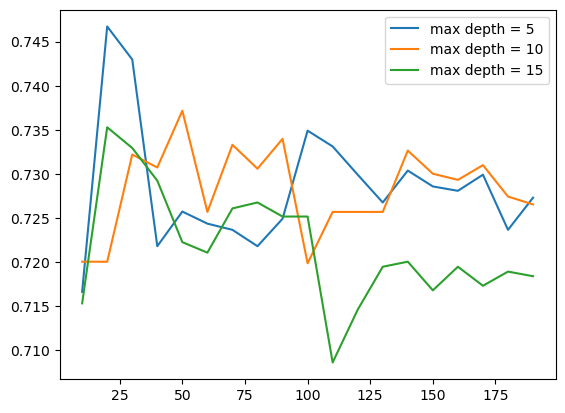

In [53]:
for d in [5,10,15]:
    df_subset = final[final.depth==d]
    plt.plot(df_subset.n_estimators, df_subset.auc,
    label = 'max depth = %d' %d)
plt.legend()

In [54]:
final

,depth,n_estimators,auc
0,5,10,0.716635
1,5,20,0.746716
2,5,30,0.742973
3,5,40,0.721808
4,5,50,0.725736
5,5,60,0.724366
6,5,70,0.723663
7,5,80,0.721808
8,5,90,0.724922
9,5,100,0.734906


#### max_depth = 5, n_estimators = 20 seems to be the best so far

In [55]:
scores = []

for s in [1,3,5,10,20]: 
    for i in range(10,200,10):
        rf = RandomForestClassifier(n_estimators = i,
                                    max_depth = 5, min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        auc = roc_auc_score(y_pred, y_val)
        scores.append((s,i,auc))

In [56]:
x = pd.DataFrame(scores, columns = ['min_samples_leaf','n_estimators','auc'])

In [57]:
x.sort_values('auc', ascending=False).head(20)

,min_samples_leaf,n_estimators,auc
1,1,20,0.746716
23,3,50,0.744736
24,3,60,0.743176
2,1,30,0.742973
20,3,20,0.742948
21,3,30,0.741191
29,3,110,0.740150
25,3,70,0.740150
26,3,80,0.738422
40,5,30,0.737907


In [58]:
??RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Source:        
class RandomForestClassifier(ForestClassifier):
    """
    A random forest classifier.

    A random forest is a meta estimator that fits a number of decision tree
    classifiers on various sub-samples of the dataset and uses averaging to
    improve the predictive accuracy and control over-fitting.
    The sub-sample size is controlled with the `max_samples` parameter if
    `bootstrap=True` (default), otherwise the whole dataset is used to build
    each tree.

    Read more in the :ref:`User Guide <forest>`.

    P

In [59]:
import xgboost as xgb

In [60]:
features = dv.get_feature_names_out()
d_train = xgb.DMatrix(X_train, label = y_train, feature_names = features)
d_val = xgb.DMatrix(X_val, label = y_val, feature_names = features)

In [61]:
watchlist = [(d_train, 'train'),(d_val,'val')]

In [62]:
%%capture output

xgb_params = {
    'eta':0.3,
    'max_depth':5,
    'min_child_weight':20,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':6,
    
    'seed':1,
    'verbosity':1
    
}

model = xgb.train(xgb_params, d_train, evals=watchlist,
                  verbose_eval = 2,
                  num_boost_round=100)

In [63]:
output

In [64]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [65]:
scores = parse_xgb_output(output)
scores

,num_iter,train_auc,val_auc
0,0,0.80213,0.74208
1,2,0.82748,0.75797
2,4,0.83943,0.76543
3,6,0.84542,0.76830
4,8,0.85195,0.77389
5,10,0.85770,0.77766
6,12,0.86182,0.78709
7,14,0.86704,0.78754
8,16,0.87138,0.78996
9,18,0.87472,0.79158


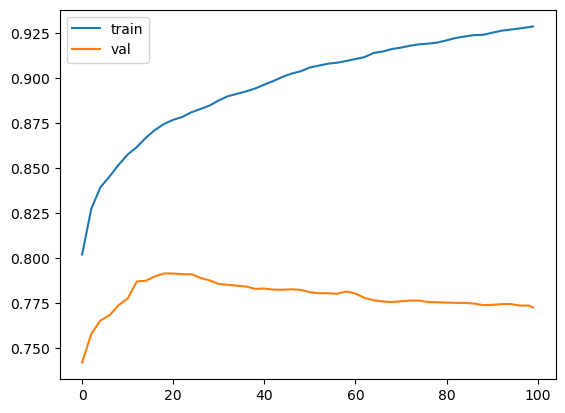

In [66]:
plt.plot(scores.num_iter, scores.train_auc, label='train')
plt.plot(scores.num_iter, scores.val_auc, label='val')
plt.legend()

#### continue from 6.8 - XGBoost Parameter Tuning

In [69]:
%%capture output

xgb_params = {
    'eta':1.0,
    'max_depth':5,
    'min_child_weight':20,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':6,
    
    'seed':1,
    'verbosity':1
    
}

model = xgb.train(xgb_params, d_train, evals=watchlist,
                  verbose_eval = 2,
                  num_boost_round=100)

In [71]:
scores = {}
key = 'eta = %s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [72]:
scores

{'eta = 1.0':     num_iter  train_auc  val_auc
 0          0    0.80213  0.74208
 1          2    0.84374  0.77059
 2          4    0.85347  0.76790
 3          6    0.86357  0.77369
 4          8    0.87041  0.76802
 5         10    0.87735  0.76728
 6         12    0.88317  0.76518
 7         14    0.88737  0.76821
 8         16    0.89453  0.76789
 9         18    0.89809  0.76665
 10        20    0.90354  0.75975
 11        22    0.90626  0.75669
 12        24    0.90904  0.76030
 13        26    0.91330  0.75340
 14        28    0.91683  0.75056
 15        30    0.92030  0.75055
 16        32    0.92161  0.75386
 17        34    0.92517  0.75281
 18        36    0.92915  0.75124
 19        38    0.93116  0.75035
 20        40    0.93359  0.75141
 21        42    0.93591  0.75322
 22        44    0.93674  0.75332
 23        46    0.93974  0.75307
 24        48    0.94286  0.75367
 25        50    0.94496  0.75318
 26        52    0.94572  0.75400
 27        54    0.94696  0.75196
 